# Analyse des données  agricoles Cas des prix du Maïs au Bénin

Le fichierer contient les colonnes suivantes 

Date	

Benin, RETAIL, Cotonou, Maize, XOF/Kg	

Benin, RETAIL, Natitingou, Maize, XOF/Kg	

Benin, RETAIL, Parakou, Maize, XOF/Kge.

Nous allons analyser ces données pour répondre aux questions suivantes :

- **Quelle est la tendance des prix du maïs dans chaque ville (Cotonou, Natitingou, Parakou) au fil du temps ?**
- **Quelle ville a le prix moyen du maïs le plus élevé et le plus bas pendant la période donnée ?**
- **Y a-t-il une corrélation entre les prix du maïs dans différentes villes ?**
- **Comment les prix du maïs varient-ils d'un mois à un autre ?**
- **Quelle est la variation moyenne des prix du maïs entre ces trois villes ?**

Ces questions guideront notre étude.e votre étude.

## Importation et nettoyage des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Notions\Projets d'analyse de données\Analyse des prix du maïs Bénin\Price.csv")


In [3]:
df.head()

,Date,"Benin, RETAIL, Cotonou, Maize, XOF/Kg","Benin, RETAIL, Natitingou, Maize, XOF/Kg","Benin, RETAIL, Parakou, Maize, XOF/Kg"
0,03/01/2024,360.0,289.0,336.0
1,01/01/2024,248.0,201.0,248.0
2,Invalid date,300.0,219.0,280.0
3,11/01/2023,259.0,215.0,255.0
4,10/01/2023,340.0,275.0,300.0


In [4]:
#Suppression des données manquantes

df.dropna(inplace = True)

In [5]:
df.head()

,Date,"Benin, RETAIL, Cotonou, Maize, XOF/Kg","Benin, RETAIL, Natitingou, Maize, XOF/Kg","Benin, RETAIL, Parakou, Maize, XOF/Kg"
0,03/01/2024,360.0,289.0,336.0
1,01/01/2024,248.0,201.0,248.0
2,Invalid date,300.0,219.0,280.0
3,11/01/2023,259.0,215.0,255.0
4,10/01/2023,340.0,275.0,300.0


In [6]:
#Supression des données en doubles

df.drop_duplicates(inplace = True)

In [7]:
df.head()

,Date,"Benin, RETAIL, Cotonou, Maize, XOF/Kg","Benin, RETAIL, Natitingou, Maize, XOF/Kg","Benin, RETAIL, Parakou, Maize, XOF/Kg"
0,03/01/2024,360.0,289.0,336.0
1,01/01/2024,248.0,201.0,248.0
2,Invalid date,300.0,219.0,280.0
3,11/01/2023,259.0,215.0,255.0
4,10/01/2023,340.0,275.0,300.0


In [8]:
df.shape

(83, 4)

In [9]:
#Remplacer les Invalid date par des NaT

df["Date"] = df["Date"].replace("Invalid date", pd.NaT)


In [10]:
#Supprimer les NaT
df.dropna(subset=["Date"] , inplace = True)


In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
#Convertir Date to Datetime

df["Date"] = pd.to_datetime(df["Date"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      36 non-null     datetime64[ns]
 1   Benin, RETAIL, Cotonou, Maize, XOF/Kg     36 non-null     float64       
 2   Benin, RETAIL, Natitingou, Maize, XOF/Kg  36 non-null     float64       
 3   Benin, RETAIL, Parakou, Maize, XOF/Kg     36 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.3 KB


In [14]:
#Remplacer l'index par les dates
df.set_index("Date", inplace=True)


In [15]:
#Trions
df.sort_index(inplace=True)


In [16]:
df.head()

,"Benin, RETAIL, Cotonou, Maize, XOF/Kg","Benin, RETAIL, Natitingou, Maize, XOF/Kg","Benin, RETAIL, Parakou, Maize, XOF/Kg"
Date,,,
2014-09-01,181.0,130.0,166.0
2014-10-01,182.0,118.0,173.0
2014-11-01,177.0,129.0,199.0
2015-09-01,257.0,184.0,241.0
2015-10-01,260.0,182.0,242.0


## Quelle est la tendance des prix du maïs dans chaque ville (Cotonou, Natitingou, Parakou) au fil du temps ?

C:\Users\Utilisateur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilisateur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilisateur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilisateur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

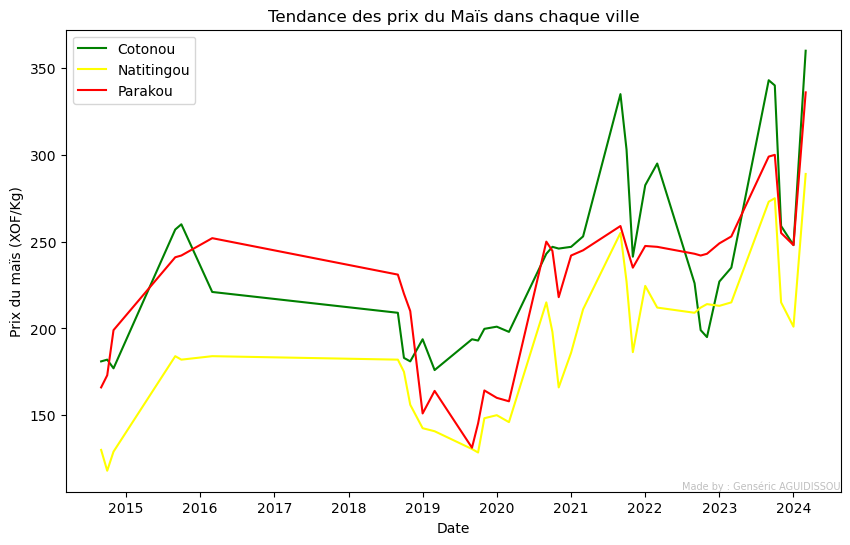

In [61]:
#Tracer les courbes de tendance des prix du maïs dans chaque ville.

plt.figure(figsize=(10,6))

sns.lineplot(x=df.index, y='Benin, RETAIL, Cotonou, Maize, XOF/Kg', data=df, color='green', label='Cotonou')
sns.lineplot(x=df.index, y='Benin, RETAIL, Natitingou, Maize, XOF/Kg', data=df, color='yellow', label='Natitingou')
sns.lineplot(x=df.index, y='Benin, RETAIL, Parakou, Maize, XOF/Kg', data=df, color='red', label='Parakou')

plt.title('Tendance des prix du Maïs dans chaque ville')
plt.xlabel('Date')
plt.ylabel('Prix du maïs (XOF/Kg)')
plt.legend()


plt.text(1, 0, 'Made by : Genséric AGUIDISSOU',
         horizontalalignment='right',
         verticalalignment='bottom',
         transform=plt.gca().transAxes,
         fontsize=7, color='gray', alpha=0.5)

plt.show()


## Quelle ville a le prix moyen du maïs le plus élevé et le plus bas pendant la période donnée ?

In [18]:
df.describe()

,"Benin, RETAIL, Cotonou, Maize, XOF/Kg","Benin, RETAIL, Natitingou, Maize, XOF/Kg","Benin, RETAIL, Parakou, Maize, XOF/Kg"
count,36.000000,36.000000,36.000000
mean,236.974444,189.536944,225.303333
std,51.376110,43.948468,46.842146
min,176.000000,118.000000,131.250000
25%,194.687500,149.562500,192.500000
50%,231.000000,186.165000,242.000000
75%,257.500000,214.250000,248.250000
max,360.000000,289.000000,336.000000


In [19]:
# Calculer les prix moyens
mean_prices = df.mean()

In [20]:
city_with_highest_mean_price = mean_prices.idxmax()
city_with_lowest_mean_price = mean_prices.idxmin()


In [21]:
city_with_highest_mean_price

'Benin, RETAIL, Cotonou, Maize, XOF/Kg'

In [22]:
city_with_lowest_mean_price

'Benin, RETAIL, Natitingou, Maize, XOF/Kg'

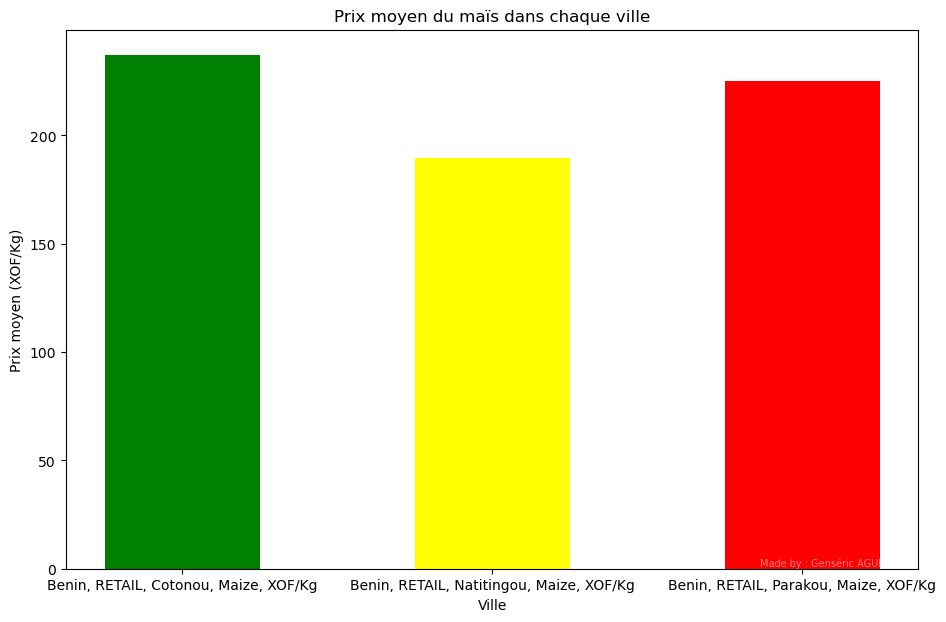

In [76]:
# Créer un diagramme à barres
plt.figure(figsize=(11,7))
colors = ['green' if city.endswith('Cotonou, Maize, XOF/Kg') else 'red' if city.endswith('Parakou, Maize, XOF/Kg') else 'yellow' for city in mean_prices.index]
plt.bar(mean_prices.index, mean_prices, color=colors, width=0.5)

# Ajouter des titres et des étiquettes
plt.title('Prix moyen du maïs dans chaque ville')
plt.xlabel('Ville')
plt.ylabel('Prix moyen (XOF/Kg)')

plt.text(1, 0, 'Made by : Genséric AGUIDISSOU',
         horizontalalignment='right',
         verticalalignment='bottom',
         transform=plt.gca().transAxes,
         fontsize=7, color='white', alpha=0.5)

# Afficher le graphique
plt.show()


## Y a-t-il une corrélation entre les prix du maïs dans différentes villes ?

In [24]:
#Calcul de la correlation

correlation = df.corr()


In [25]:
correlation

,"Benin, RETAIL, Cotonou, Maize, XOF/Kg","Benin, RETAIL, Natitingou, Maize, XOF/Kg","Benin, RETAIL, Parakou, Maize, XOF/Kg"
"Benin, RETAIL, Cotonou, Maize, XOF/Kg",1.000000,0.870323,0.792904
"Benin, RETAIL, Natitingou, Maize, XOF/Kg",0.870323,1.000000,0.923817
"Benin, RETAIL, Parakou, Maize, XOF/Kg",0.792904,0.923817,1.000000


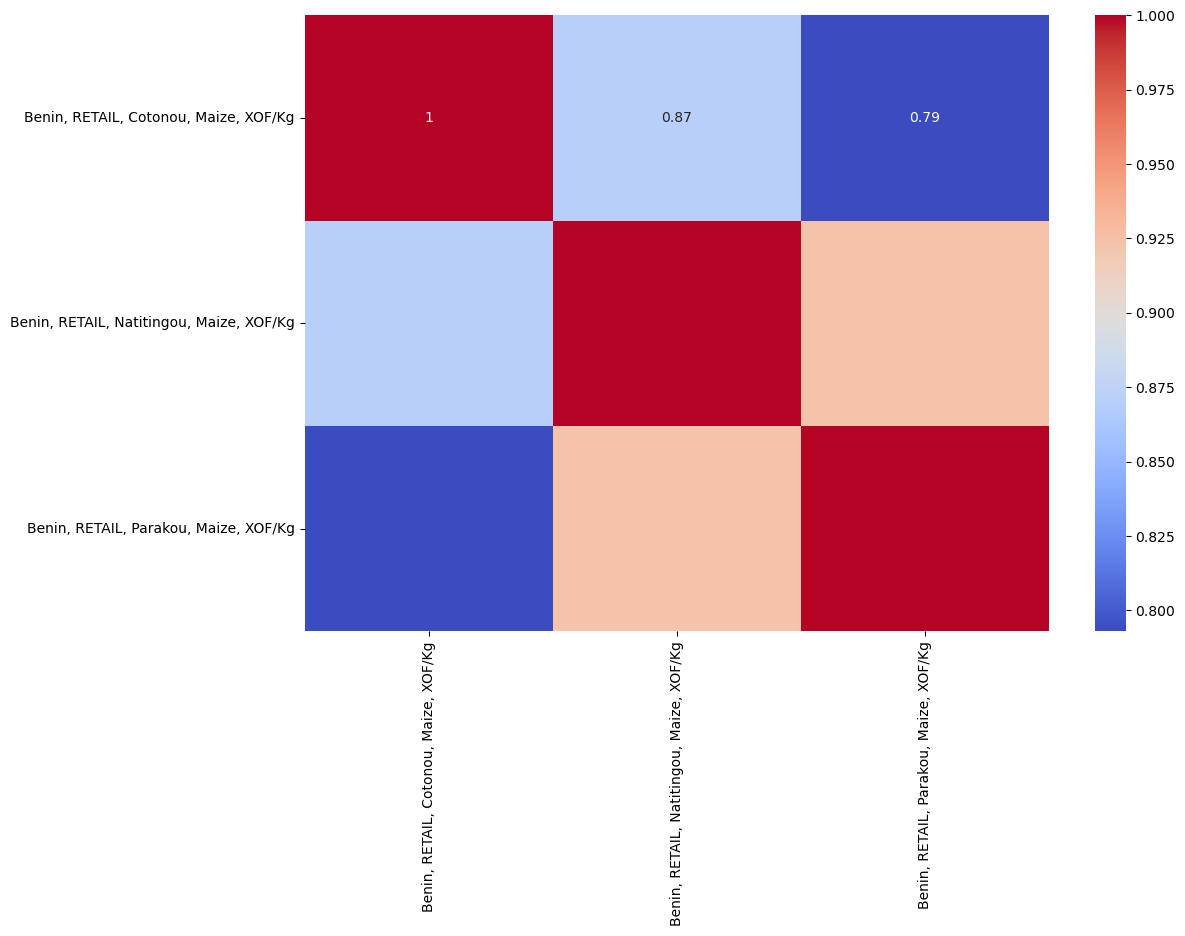

In [26]:
# Créer une carte de chaleur pour visualiser la corrélation
sns.heatmap(correlation, annot=True, cmap='coolwarm', annot_kws={"size": 10})


# Afficher le graphique
plt.show()

### Oui, il existe une bonne et positive correlation entre les prix du maïs dans différentes villes

La corrélation des prix du maïs entre Cotonou et Natitingou est de 0.870323, ce qui indique une forte corrélation positive. Cela signifie que lorsque le prix du maïs augmente à Cotonou, il a également tendance à augmenter à Natitingou, et vice versa.

La corrélation des prix du maïs entre Cotonou et Parakou est de 0.792904, ce qui indique également une forte corrélation positive, mais un peu plus faible que celle entre Cotonou et Natitingou
.
La corrélation des prix du maïs entre Natitingou et Parakou est de 0.923817, ce qui indique une très forte corrélation positive. Cela signifie que lorsque le prix du maïs augmente à Natitingou, il a également tendance à augmenter fortement à Parakou, et vice versa.

## Comment les prix du maïs varient-ils d'un mois à un autre ?

In [28]:
#Création d'une colonne ‘Mois’ à partir de la colonne ‘Date’ :

df['Mois'] = df.index.strftime('%B')

In [29]:
df.sample(5)

,"Benin, RETAIL, Cotonou, Maize, XOF/Kg","Benin, RETAIL, Natitingou, Maize, XOF/Kg","Benin, RETAIL, Parakou, Maize, XOF/Kg",Mois
Date,,,,
2015-09-01,257.00,184.00,241.0,September
2023-03-01,235.00,215.00,253.0,March
2021-11-01,241.33,186.33,235.0,November
2018-10-01,183.00,175.00,220.0,October
2018-09-01,209.00,182.00,231.0,September


In [30]:
# Calculer le prix moyen du maïs pour chaque mois pour toutes les villes
df['Prix_moyen'] = df[['Benin, RETAIL, Cotonou, Maize, XOF/Kg', 'Benin, RETAIL, Natitingou, Maize, XOF/Kg', 'Benin, RETAIL, Parakou, Maize, XOF/Kg']].mean(axis=1)

In [31]:
df.head()

,"Benin, RETAIL, Cotonou, Maize, XOF/Kg","Benin, RETAIL, Natitingou, Maize, XOF/Kg","Benin, RETAIL, Parakou, Maize, XOF/Kg",Mois,Prix_moyen
Date,,,,,
2014-09-01,181.0,130.0,166.0,September,159.000000
2014-10-01,182.0,118.0,173.0,October,157.666667
2014-11-01,177.0,129.0,199.0,November,168.333333
2015-09-01,257.0,184.0,241.0,September,227.333333
2015-10-01,260.0,182.0,242.0,October,228.000000


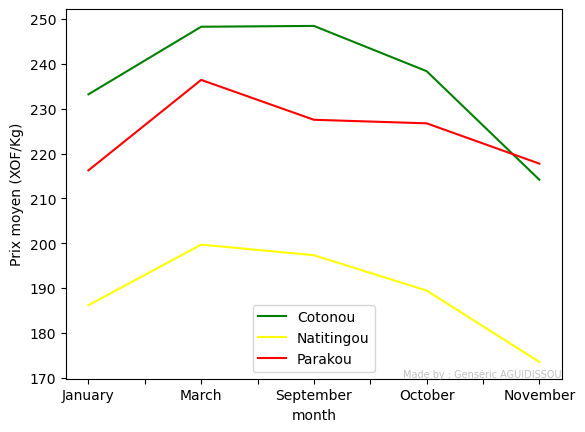

In [66]:
# liste ordonnée des noms des mois
months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Nouvelle colonne 'month' avec les noms des mois
df['month'] = pd.Categorical(df.index.month_name(), categories=months_ordered, ordered=True)

# Traçons la courbe pour chaque ville
monthly_avg_prices['Benin, RETAIL, Cotonou, Maize, XOF/Kg'].plot(kind='line', color='green', label='Cotonou')
monthly_avg_prices['Benin, RETAIL, Natitingou, Maize, XOF/Kg'].plot(kind='line', color='yellow', label='Natitingou')
monthly_avg_prices['Benin, RETAIL, Parakou, Maize, XOF/Kg'].plot(kind='line', color='red', label='Parakou')

plt.ylabel('Prix moyen (XOF/Kg)')
plt.legend()

plt.text(1, 0, 'Made by : Genséric AGUIDISSOU',
         horizontalalignment='right',
         verticalalignment='bottom',
         transform=plt.gca().transAxes,
         fontsize=7, color='gray', alpha=0.5)

plt.show()


### Remarque : Le prix du Maïs atteint habituellement son pic entre le mois de Mars et celui de Septembre. On observe les prix les plus bas entre les mois de Novembre et de Décembre.

## Quelle est la variation moyenne des prix du maïs entre ces trois villes ?

In [46]:
# Calculons la différence de prix entre les villes
df['Cotonou_Natitingou'] = df['Benin, RETAIL, Cotonou, Maize, XOF/Kg'] - df['Benin, RETAIL, Natitingou, Maize, XOF/Kg']
df['Cotonou_Parakou'] = df['Benin, RETAIL, Cotonou, Maize, XOF/Kg'] - df['Benin, RETAIL, Parakou, Maize, XOF/Kg']
df['Parakou_Natitingou'] = df['Benin, RETAIL, Parakou, Maize, XOF/Kg'] - df['Benin, RETAIL, Natitingou, Maize, XOF/Kg']

# Calculons la moyenne des différences de prix entre les villes
mean_diff_Cotonou_Natitingou = df['Cotonou_Natitingou'].mean()
mean_diff_Cotonou_Parakou = df['Cotonou_Parakou'].mean()
mean_diff_Parakou_Natitingou = df['Parakou_Natitingou'].mean()

In [47]:
# Affichons les moyennes
print(f"La moyenne de la différence des prix du maïs entre Cotonou et Natitingou sur l'ensemble des périodes est de {mean_diff_Cotonou_Natitingou} XOF/Kg.")
print(f"La moyenne de la différence des prix du maïs entre Cotonou et Parakou sur l'ensemble des périodes est de {mean_diff_Cotonou_Parakou} XOF/Kg.")
print(f"La moyenne de la différence des prix du maïs entre Parakou et Natitingou sur l'ensemble des périodes est de {mean_diff_Parakou_Natitingou} XOF/Kg.")


La moyenne de la différence des prix du maïs entre Cotonou et Natitingou sur l'ensemble des périodes est de 47.4375 XOF/Kg.
La moyenne de la différence des prix du maïs entre Cotonou et Parakou sur l'ensemble des périodes est de 11.671111111111111 XOF/Kg.
La moyenne de la différence des prix du maïs entre Parakou et Natitingou sur l'ensemble des périodes est de 35.76638888888888 XOF/Kg.


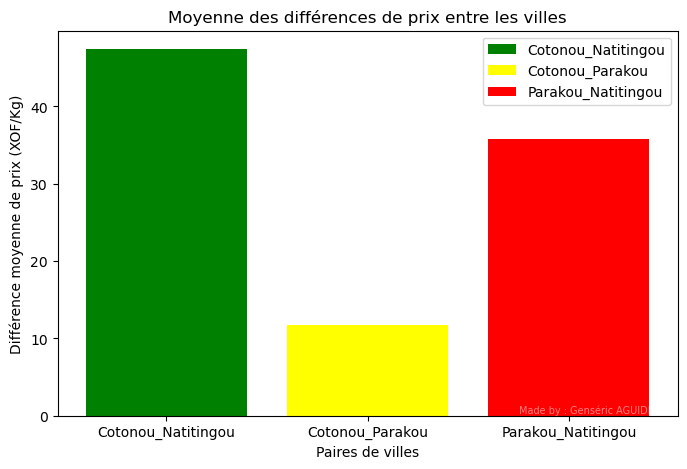

In [70]:
# Visualisation à l'aide d'un graphique à barres
plt.figure(figsize=(8, 5))
plt.bar('Cotonou_Natitingou', mean_diff_Cotonou_Natitingou, color='green', label='Cotonou_Natitingou')
plt.bar('Cotonou_Parakou', mean_diff_Cotonou_Parakou, color='yellow', label='Cotonou_Parakou')
plt.bar('Parakou_Natitingou', mean_diff_Parakou_Natitingou, color='red', label='Parakou_Natitingou')

plt.title('Moyenne des différences de prix entre les villes')
plt.xlabel('Paires de villes')
plt.ylabel('Différence moyenne de prix (XOF/Kg)')
plt.legend()

plt.text(1, 0, 'Made by : Genséric AGUIDISSOU',
         horizontalalignment='right',
         verticalalignment='bottom',
         transform=plt.gca().transAxes,
         fontsize=7, color='white', alpha=0.5)
plt.show()